In [63]:
import numpy as np
import pandas as pd
from collections import OrderedDict

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

In [64]:
data = pd.read_csv('/Users/lixiang/Documents/GitHub/Project2-2/Project_2-2/NL_data/ams.csv')

In [65]:
data.head()

,time,t2m
0,2010-01-01 00:00:00,273.37634
1,2010-01-01 01:00:00,273.35657
2,2010-01-01 02:00:00,273.28820
3,2010-01-01 03:00:00,273.26855
4,2010-01-01 04:00:00,273.21570


In [66]:
# Convert 'time' to datetime
data['time'] = pd.to_datetime(data['time'])

# Create lagged features based on past temperature values
window_size = 15  # You can adjust the size of the window
for i in range(1, window_size + 1):
    data[f't2m_lag_{i}'] = data['t2m'].shift(i)

# Drop rows with NaN values which are the result of shifting
data = data.dropna()

# Re-establish 'time' as the DataFrame's index
data.set_index('time', inplace=True)

# Splitting data into features and target
X = data[[f't2m_lag_{i}' for i in range(1, window_size + 1)]]
y = data['t2m']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [68]:
X_train.shape, y_train.shape

((100550, 15), (100550,))

In [69]:
reg = RandomForestRegressor()

In [70]:
reg.fit(X_train, y_train)

RandomForestRegressor()

In [71]:
y_pred = reg.predict(X_test)

In [92]:
# Evaluation
mse = mean_squared_error(y_test, y_pred)
train_score = round(reg.score(X_train, y_train) * 100, 2)
valid_score = round(reg.score(X_test, y_test) * 100, 2)

print('Mean Squared Error (MSE):', mse)
print('Train_score:', train_score)
print('Valid_score:', valid_score)


Mean Squared Error (MSE): 0.18679085581944652
Train_score: 99.94
Valid_score: 99.52


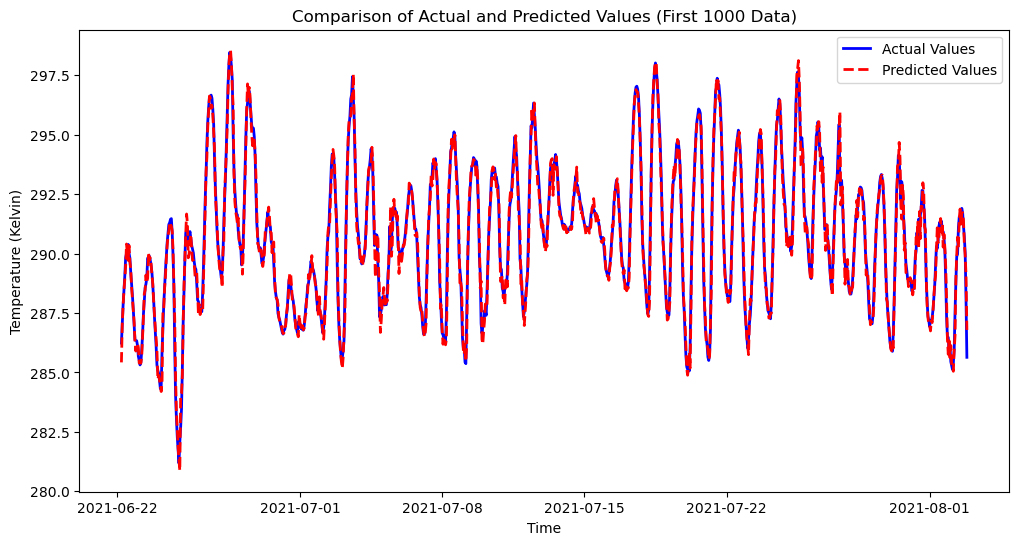

In [89]:
import matplotlib.pyplot as plt
start_index = 0
end_index = 1000

# Slice the data
y_test_part = y_test.iloc[start_index:end_index]
y_pred_part = pd.Series(y_pred, index=y_test.index).iloc[start_index:end_index]

# Plot the sliced data
plt.figure(figsize=(12, 6))
plt.plot(y_test_part.index, y_test_part, color='blue', label='Actual Values', linewidth=2)
plt.plot(y_test_part.index, y_pred_part, color='red', label='Predicted Values', linewidth=2, linestyle='--')
plt.title('Comparison of Actual and Predicted Values (First '+ str(end_index) +' Data)')
plt.xlabel('Time')
plt.ylabel('Temperature (Kelvin)')
plt.legend()
plt.show()
